**Integrante 1:** Kadyha Paz Gutierrez  
**CC:** 1020482429

**Integrante 2:** DANIEL MARTÍNEZ GALEANO   
**CC:** 1036645337

#Librerias necesarias


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis         #Discriminante cuadratico
from sklearn.neighbors import KernelDensity                                     #Ventana de Parzen (Método kernel)
from sklearn.ensemble import GradientBoostingClassifier                         #Gradient Boosting Tree
from sklearn.neural_network import MLPClassifier                                #Redes Neuronales Artificiales
from sklearn.svm import SVC                                                     #Maquina de soporte vectorial
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold                             #Validación cruzada (k-fold cross-validation)
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import product
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


#Obtención y limpieza del dataset

###Se carga la base de datos

In [4]:
!git clone https://github.com/Kadyha/SkillCraft1_Dataset.git

fatal: destination path 'SkillCraft1_Dataset' already exists and is not an empty directory.


In [5]:
df = pd.read_csv('SkillCraft1_Dataset/SkillCraft1_Dataset.csv')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


##Se buscan valores faltantes

In [6]:
k = df.isna().sum()
k

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [7]:
df.shape

(3395, 20)

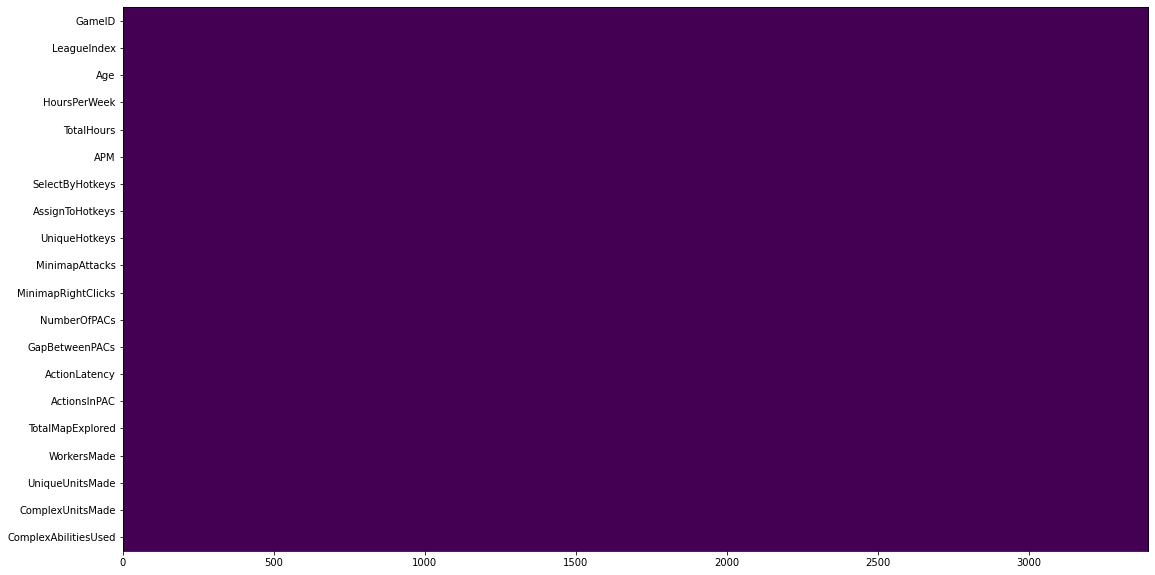

In [8]:
ax = plt.figure(figsize=(25,10)).add_subplot(111)
ax.imshow(df.isna().values.T)
ax.set_aspect(90)
plt.yticks(range(df.shape[1]), df.columns);

Inicialmente parece que no hay valores faltantes, sin embargo al analizar la información del dataset se puede notar que algunos tipos de datos no coinciden con los que se encuentran en la documentación

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

Se puede encontrar el simbolo "?" en el dataset, este debería tener unicamente valores númericos

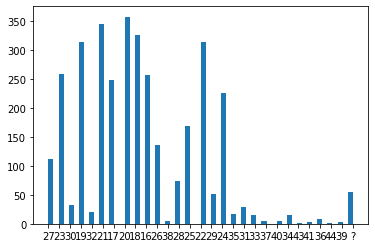

In [10]:
plt.hist(df.Age, bins=60);

In [11]:
df.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


El simbolo "?" se encuentra en la edad, horas por semana y horas totales en la liga número 8, está liga tiene muy pocos datos en comparación con las demás, y es dificil rellenar estos datos faltantes, por lo que se decide eliminarla.

In [12]:
df = df[(df != '?')]
df = df.apply(pd.to_numeric)
df.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,NaN,NaN,NaN,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


Al revisar nuevamente la información de los datos se puede ver que el tipo de dato coincide con la documentación

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3340 non-null   float64
 3   HoursPerWeek          3339 non-null   float64
 4   TotalHours            3338 non-null   float64
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

algunos valores se convirtieron en Nan

In [14]:
df.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

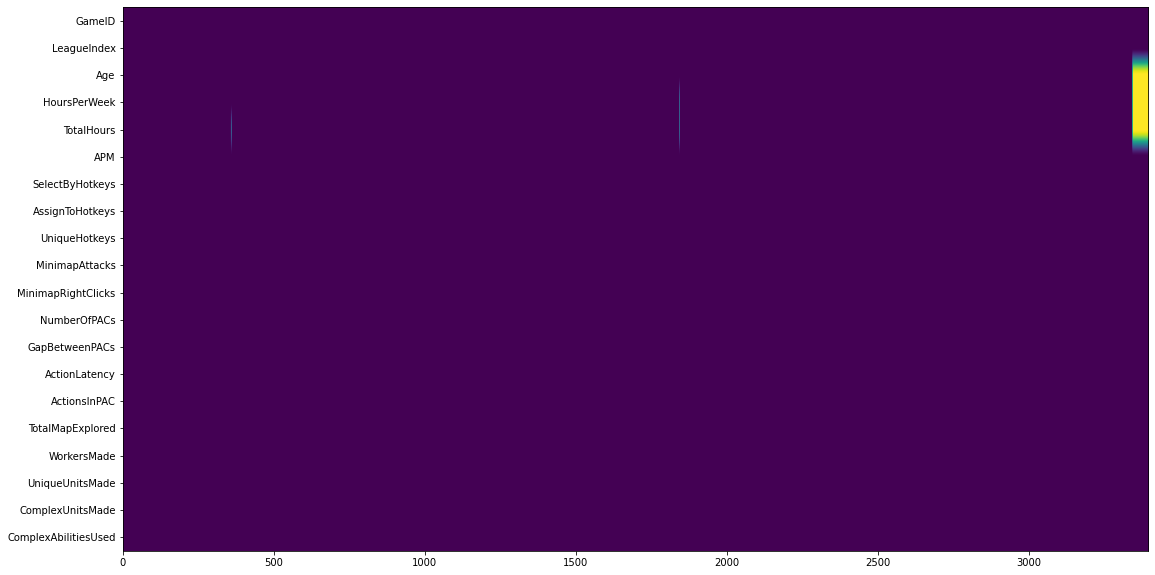

In [15]:
ax = plt.figure(figsize=(25,10)).add_subplot(111)
ax.imshow(df.isna().values.T)
ax.set_aspect(90)
plt.yticks(range(df.shape[1]), df.columns);

Estos valores se eliminan usando dropna()

In [16]:
df = df.dropna()
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

##Se dividen los datos en X, y

---



In [17]:
df.columns

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')

Para X se toman todas las columnas excepto LeagueIndex, que corresponde a las etiquetas que se quieren predecir y GameID que es un identificador unico para cada juego

In [18]:
X = df.drop(['LeagueIndex'], axis=1).copy()
X = X.drop(['GameID'], axis=1).copy()
X = X.dropna()
X = X.values
X.shape

(3338, 18)

Para las etiquetas y, se toman los valores de la columna LeagueIndex

In [19]:
y = df.LeagueIndex.values
y.shape

(3338,)

In [20]:
y

array([5, 5, 4, ..., 4, 3, 4])

#Entrenamiento y evaluación de los modelos

##Modelos

Los datos se dividen usando un 80% para (entrenamiento y test) y un 20% para validación

In [21]:
X, X_val, y, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

###Discriminante cuadratico

In [53]:
def DiscriminanteCuadratico(X,Y,regParams):
    
    skf = StratifiedKFold()
    resultados = pd.DataFrame()
    idx = 0

    EficienciaTrain = []
    EficienciaVal = []
    MatthewsTrain = []
    MatthewsTest =  []

    for reg_param in regParams:
      for train, test in skf.split(X, Y):
          Xtrain = X[train,:]
          Ytrain = Y[train]
          Xtest = X[test,:]
          Ytest = Y[test]

          #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
          modelo= QuadraticDiscriminantAnalysis(reg_param=reg_param)
          modelo =modelo.fit(Xtrain,Ytrain)
          #predecir muestras de entrenamiento
          Ytrain_pred =  modelo.predict(Xtrain)
          #predecir muestras de pruebas
          Yest = modelo.predict(Xtest)
          #Evaluamos las predicciones del modelo con los datos de test
          
          EficienciaTrain.append(balanced_accuracy_score(y_true = Ytrain, y_pred = Ytrain_pred))
          EficienciaVal.append(balanced_accuracy_score( y_true= Ytest, y_pred=Yest))
          MatthewsTrain.append(matthews_corrcoef(y_true = Ytrain, y_pred = Ytrain_pred))
          MatthewsTest.append(matthews_corrcoef( y_true= Ytest, y_pred=Yest))

      resultados.loc[idx,'Reg param'] = reg_param
      resultados.loc[idx,'Balanced Accuracy train'] = np.mean(EficienciaTrain)
      resultados.loc[idx,'Balanced Accuracy test'] =np.mean(EficienciaVal)
      resultados.loc[idx,'Std  train'] = np.std(EficienciaTrain)
      resultados.loc[idx,'Std test'] = np.std(EficienciaVal)
      resultados.loc[idx,'Matthews corrcoef train'] = np.mean(MatthewsTrain)
      resultados.loc[idx,'Matthews corrcoef test'] = np.mean(MatthewsTest)
      resultados.loc[idx,'resta de accuracy'] = np.abs(np.mean(EficienciaTrain)-np.mean(EficienciaVal))

      idx+=1

    return (resultados)

###Ventana de Parzen (Método kernel)

In [87]:
def VentanaParzen (X, Y, hs):
    
    skf = StratifiedKFold()
    resultados = pd.DataFrame()
    idx = 0

    EficienciaTrain = []
    EficienciaVal = []
    MatthewsTrain = []
    MatthewsTest =  []

    for h in hs:
      for train, test in skf.split(X, Y):
          Xtrain = X[train,:]
          Ytrain = Y[train]
          Xtest = X[test,:]
          Ytest = Y[test]

          nsamples, nx, ny = Xtrain.shape
          Xtrain = Xtrain.reshape((nsamples,nx*ny))
          #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
          modelo = KernelDensity(bandwidth=h)
          modelo =modelo.fit(Xtrain[:, None])
          #predecir muestras de entrenamiento
          Ytrain_pred =  modelo.score_samples(Xtrain[:, None])
          #predecir muestras de pruebas
          #Evaluamos las predicciones del modelo con los datos de test
          
          EficienciaTrain.append(balanced_accuracy_score(y_true = Ytrain, y_pred = Ytrain_pred))
          MatthewsTrain.append(matthews_corrcoef(y_true = Ytrain, y_pred = Ytrain_pred))

      resultados.loc[idx,'Ancho de ventana '] = h 
      resultados.loc[idx,'Balanced Accuracy train'] = np.mean(EficienciaTrain)
      resultados.loc[idx,'Std  train'] = np.std(EficienciaTrain)
      resultados.loc[idx,'Matthews corrcoef train'] = np.mean(MatthewsTrain)

      idx+=1

    return (resultados)

###Gradient Boosting Tree

In [24]:
def GradientBoostingTree(num_trees,maxdepth, X, Y):
    
    skf = StratifiedKFold()
    resultados = pd.DataFrame()

    
    idx = 0
    for trees in num_trees:
        for depth in maxdepth:
          AccuTrain = []
          AccuVal = []
          tprs = []
          MatthewsTrain = []
          MatthewsTest =  []
          
          mean_fpr = np.linspace(0, 1, 100)

          i = 1
          for train, test in skf.split(X, Y):
              Xtrain = X[train,:]
              Ytrain = Y[train]
              Xtest = X[test,:]
              Ytest = Y[test]

              modelo= GradientBoostingClassifier(n_estimators= trees, max_depth=depth)
              modelo =modelo.fit(Xtrain,Ytrain)
              
              Ytrain_pred =  modelo.predict(Xtrain)
              
              Yest = modelo.predict(Xtest)
                        
        
              AccuTrain.append(balanced_accuracy_score(y_true=Ytrain,y_pred=Ytrain_pred))
              AccuVal.append(balanced_accuracy_score(y_true=Ytest,y_pred=Yest))
              MatthewsTrain.append(matthews_corrcoef(y_true = Ytrain, y_pred = Ytrain_pred))
              MatthewsTest.append(matthews_corrcoef( y_true= Ytest, y_pred=Yest))

          resultados.loc[idx,'# Trees'] = trees
          resultados.loc[idx,'# Max_depth'] = depth
          resultados.loc[idx,'Accuracy Train'] = np.mean(AccuTrain)
          resultados.loc[idx,'Accuracy Test'] =np.mean(AccuVal)
          resultados.loc[idx,'Std Train'] = np.std(AccuTrain)
          resultados.loc[idx,'Std Test'] = np.std(AccuVal)      
          resultados.loc[idx,'Matthews corrcoef train'] = np.mean(MatthewsTrain)
          resultados.loc[idx,'Matthews corrcoef test'] = np.mean(MatthewsTest)
          resultados.loc[idx,'resta de accuracy'] = np.abs(np.mean(AccuTrain)-np.mean(AccuVal))

          idx+=1
    return (resultados)

###Redes Neuronales Artificiales

In [25]:
def RedesNeuronalesArtificiales(X,Y, num_hidden_layers, num_neurons):

    
    Folds=4
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            ErrorTest = np.zeros(Folds)
            ErrorTrain = np.zeros(Folds)
            tprs = []
            MatthewsTrain = []
            MatthewsTest =  []
            for j, (train, test) in enumerate(skf.split(X, Y)):
                
                Xtrain= X[train,:]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]

                scaler = StandardScaler().fit(X= Xtrain)       
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)


                hidden_layer_sizes = tuple(hidden_layers*[neurons])

                mlp = MLPClassifier(activation='logistic',hidden_layer_sizes= hidden_layer_sizes, max_iter=1000)
 
                mlp =mlp.fit(X=Xtrain,y=Ytrain)
              

                YestTrain = mlp.predict(Xtrain)
                YestTest = mlp.predict(Xtest)

            


                ErrorTrain[j] =balanced_accuracy_score(y_true= Ytrain, y_pred= YestTrain)
                ErrorTest[j] =balanced_accuracy_score(y_true= Ytest, y_pred= YestTest)
                MatthewsTrain.append(matthews_corrcoef(y_true = Ytrain, y_pred = YestTrain))
                MatthewsTest.append(matthews_corrcoef( y_true= Ytest, y_pred=YestTest))
   
            resultados.loc[idx,'# Hidden layers'] = hidden_layers
            resultados.loc[idx,'# Neurons'] = neurons 
            resultados.loc[idx,'Accuracy Train'] = np.mean(ErrorTrain)
            resultados.loc[idx,'Accuracy Test'] = np.mean(ErrorTest)
            resultados.loc[idx,'Std Train'] = np.std(ErrorTrain)
            resultados.loc[idx,'Std Test'] = np.std(ErrorTest)
            resultados.loc[idx,'Matthews corrcoef train'] = np.mean(MatthewsTrain)
            resultados.loc[idx,'Matthews corrcoef test'] = np.mean(MatthewsTest)
            resultados.loc[idx,'resta de accuracy'] = np.abs(np.mean(ErrorTrain)-np.mean(ErrorTest))

            idx+=1

   
    return (resultados)

###Maquina de soporte vectorial

In [26]:
def MaquinaSoporteVectorial(x, y, kernels, gammas,params_reg):

    idx = 0
    kf = StratifiedKFold(n_splits=4)
    # crear una lista con la combinaciones de los elementos de cada list
    kernels_gammas_regs = list(product(kernels, gammas, params_reg))
    resultados = pd.DataFrame()

    for params in kernels_gammas_regs:
        kernel, gamma, param_reg = params
        
        errores_train = []
        errores_test = []
        pct_support_vectors = []
        MatthewsTrain = []
        MatthewsTest =  []

        for train_index, test_index in kf.split(x,y):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]  
            # normalizar los datos
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)


                                    
            svm = SVC( kernel= kernel , gamma= gamma , C= param_reg)
            # Entrenar el modelo
            svm=svm.fit(X=X_train, y=y_train)
            # calculo de errores
            y_train_pred = svm.predict(X=X_train)
            y_test_pred = svm.predict(X=X_test)
            # error y pct de vectores de soporte
            errores_train.append(balanced_accuracy_score(y_true = y_train, y_pred = y_train_pred))
            errores_test.append(balanced_accuracy_score(y_true = y_test, y_pred = y_test_pred))
            MatthewsTrain.append(matthews_corrcoef(y_true = y_train, y_pred = y_train_pred))
            MatthewsTest.append(matthews_corrcoef( y_true= y_test, y_pred=y_test_pred))

            n_train = X_train.shape[0]
            pct_vs = (svm.support_vectors_.shape[0]/n_train)
            pct_support_vectors.append(pct_vs)
  

        resultados.loc[idx,'kernel'] = kernel
        resultados.loc[idx,'gamma'] = gamma
        resultados.loc[idx,'param_reg'] = param_reg
        resultados.loc[idx,'Accuracy Train'] = np.mean(errores_train)
        resultados.loc[idx,'Accuracy Test'] = np.mean(errores_test)
        resultados.loc[idx,'Std Train'] = np.std(errores_train)
        resultados.loc[idx,'Std Test'] = np.std(errores_test)
        resultados.loc[idx,'% de vectores de soporte'] = np.mean(pct_support_vectors)*100
        resultados.loc[idx,'Matthews corrcoef train'] = np.mean(MatthewsTrain)
        resultados.loc[idx,'Matthews corrcoef test'] = np.mean(MatthewsTest)
        resultados.loc[idx,'resta de accuracy'] = np.abs(np.mean(errores_train)-np.mean(errores_test))

        idx+=1

   
    return (resultados)

##Simulación

###busqueda de hiperparametros

Discriminante cuadratico

In [54]:
resultadosDC = DiscriminanteCuadratico(X,y,[0, 0.001, 0.004, 0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1])
resultadosDC

,Reg param,Balanced Accuracy train,Balanced Accuracy test,Std train,Std test,Matthews corrcoef train,Matthews corrcoef test,resta de accuracy
0,0.000,0.495687,0.315663,0.006919,0.023047,0.262020,0.172880,0.180023
1,0.001,0.459034,0.323722,0.038619,0.019755,0.261669,0.188835,0.135312
2,0.004,0.446761,0.326227,0.037104,0.017704,0.261431,0.193814,0.120534
3,0.100,0.441047,0.330527,0.034186,0.019391,0.261745,0.196832,0.110521
4,0.200,0.438149,0.334543,0.031655,0.020812,0.262145,0.199683,0.103606
5,0.300,0.436729,0.337868,0.029388,0.021383,0.262713,0.202288,0.098861
6,0.500,0.436926,0.341966,0.027447,0.025759,0.263039,0.204704,0.094960
7,0.800,0.436957,0.345865,0.025740,0.027891,0.261897,0.206170,0.091092
8,0.900,0.436873,0.348894,0.024312,0.028469,0.260326,0.206445,0.087978
9,1.000,0.419866,0.340762,0.056005,0.037747,0.241509,0.192193,0.079104


Ventana de parzen

In [ ]:
#resultsParzen=  VentanaParzen(X,y,hs=[0.000001,0.01,0.1,1,3,6,50])
#resultsParzen

Gradient boosting tree

In [77]:
resultadosGBT = GradientBoostingTree([1, 3, 5, 10, 25,50],[1,4,9,20, 50, 75, 100], X, y)
resultadosGBT

,# Trees,# Max_depth,Accuracy Train,Accuracy Test,Std Train,Std Test,Matthews corrcoef train,Matthews corrcoef test,resta de accuracy
0,1.0,1.0,0.177680,0.171920,0.003807,0.007346,0.096936,0.080464,0.005760
1,1.0,4.0,0.316669,0.196852,0.018058,0.012789,0.211793,0.108071,0.119817
2,1.0,9.0,0.699239,0.226949,0.021889,0.027385,0.644347,0.126160,0.472290
3,1.0,20.0,0.991524,0.247189,0.004480,0.030998,0.989841,0.132442,0.744335
4,1.0,50.0,1.000000,0.235353,0.000000,0.036597,1.000000,0.124548,0.764647
5,1.0,75.0,1.000000,0.235917,0.000000,0.027696,1.000000,0.123427,0.764083
6,1.0,100.0,1.000000,0.234931,0.000000,0.028974,1.000000,0.118487,0.765069
7,3.0,1.0,0.224108,0.210887,0.006486,0.014921,0.158281,0.139350,0.013221
8,3.0,4.0,0.506851,0.269727,0.021224,0.029557,0.379573,0.182071,0.237124
9,3.0,9.0,0.894049,0.278890,0.014345,0.029443,0.857494,0.170806,0.615159


Redes neuronales artificiales

In [30]:
resultadosRNA = RedesNeuronalesArtificiales(X,y, [1,2,3], [1, 3, 5, 10, 20,50,100,500])
resultadosRNA

,# Hidden layers,# Neurons,Accuracy Train,Accuracy Test,Std Train,Std Test,Matthews corrcoef train,Matthews corrcoef test,resta de accuracy
0,1.0,1.0,0.263220,0.257065,0.020221,0.020150,0.221967,0.209154,0.006155
1,1.0,3.0,0.323235,0.314730,0.005718,0.010322,0.284775,0.269469,0.008504
2,1.0,5.0,0.335931,0.321338,0.018180,0.014023,0.292451,0.262807,0.014593
3,1.0,10.0,0.341853,0.325233,0.011770,0.018392,0.291242,0.258160,0.016620
4,1.0,20.0,0.362427,0.332923,0.007205,0.007753,0.300975,0.255553,0.029504
5,1.0,50.0,0.357968,0.341354,0.005258,0.019020,0.294496,0.264765,0.016615
6,1.0,100.0,0.357330,0.340727,0.006915,0.012339,0.296786,0.271027,0.016604
7,1.0,500.0,0.376162,0.325933,0.043651,0.009522,0.282500,0.244705,0.050229
8,2.0,1.0,0.247298,0.244150,0.020876,0.022033,0.206688,0.199966,0.003148
9,2.0,3.0,0.320955,0.313977,0.009994,0.012115,0.281486,0.267772,0.006978


Maquina de soporte vectorial

In [116]:
resultadosMSV=  MaquinaSoporteVectorial(X,y,kernels=['linear','rbf'],gammas = [0.001,0.01], params_reg = [0.1, 1, 2, 5,10])
resultadosMSV

,kernel,gamma,param_reg,Accuracy Train,Accuracy Test,Std Train,Std Test,% de vectores de soporte,Matthews corrcoef train,Matthews corrcoef test,resta de accuracy
0,linear,0.001,0.1,0.346768,0.318856,0.008639,0.016826,97.715296,0.293501,0.256493,0.027912
1,linear,0.001,1.0,0.361529,0.329974,0.004421,0.022066,97.465646,0.302328,0.258997,0.031555
2,linear,0.001,2.0,0.371976,0.328989,0.011794,0.020904,97.390708,0.302696,0.256719,0.042987
3,linear,0.001,5.0,0.372407,0.331681,0.015397,0.020778,97.465609,0.300605,0.259240,0.040726
4,linear,0.001,10.0,0.373592,0.329567,0.014165,0.022917,97.478121,0.301774,0.257437,0.044025
5,linear,0.010,0.1,0.346768,0.318856,0.008639,0.016826,97.715296,0.293501,0.256493,0.027912
6,linear,0.010,1.0,0.361529,0.329974,0.004421,0.022066,97.465646,0.302328,0.258997,0.031555
7,linear,0.010,2.0,0.371976,0.328989,0.011794,0.020904,97.390708,0.302696,0.256719,0.042987
8,linear,0.010,5.0,0.372407,0.331681,0.015397,0.020778,97.465609,0.300605,0.259240,0.040726
9,linear,0.010,10.0,0.373592,0.329567,0.014165,0.022917,97.478121,0.301774,0.257437,0.044025


###Evaluación con los mejores hiperparametros


In [34]:
def tablaResultados(y_true, y_pred):
    resultados = pd.DataFrame()

    accuracyVal = []
    MatthewsTest =  []
          
    accuracyVal.append(balanced_accuracy_score( y_true= y_val, y_pred=y_pred))
    MatthewsTest.append(matthews_corrcoef( y_true= y_val, y_pred=y_pred))

    resultados.loc[0,'Balanced Accuracy test'] =np.mean(accuracyVal)
    resultados.loc[0,'Std test'] = np.std(accuracyVal)
    resultados.loc[0,'Matthews corrcoef test'] = np.mean(MatthewsTest)
    return (resultados)

Discriminante cuadratico

In [27]:
dc= QuadraticDiscriminantAnalysis(reg_param=1.000	).fit(X,y)
y_val_predict =  dc.predict(X_val)
tablaResultados(y_true=y_val,y_pred=y_val_predict)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.274676,0.0,0.058958


Gradient boosting tree

In [83]:
gbt= GradientBoostingClassifier(n_estimators= 10, max_depth=1).fit(X,y)
y_val_predict =  gbt.predict(X_val)
tablaResultados(y_true=y_val,y_pred=y_val_predict)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.280526,0.0,0.196506


Redes neuronales artificiales

In [39]:
rna = MLPClassifier(activation='logistic',hidden_layer_sizes= tuple(3*[100]), max_iter=1000).fit(X=X,y=y)
y_val_predict = rna.predict(X_val)
tablaResultados(y_true=y_val,y_pred=y_val_predict)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.347663,0.0,0.283631


Maquina de soporte vectorial

In [40]:
msv = SVC( kernel= "linear" , gamma= 0.01 , C= 2).fit(X=X, y=y)
y_val_predict = msv.predict(X=X_val)
tablaResultados(y_true=y_val,y_pred=y_val_predict)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.320197,0.0,0.272434


#Selección/estracción de características

##Análisis de características

###Análisis individual

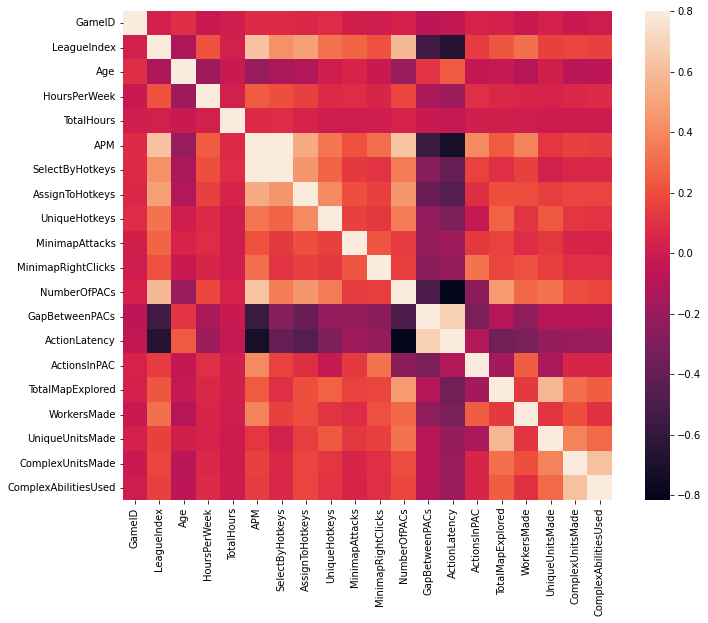

In [90]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [102]:
dfCorr=(df.drop(['LeagueIndex'],axis=1)).corr()

In [103]:
dfCorr

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.088511,-0.025322,0.004178,0.075944,0.070298,0.063915,0.081176,0.022422,0.009898,0.035622,-0.065629,-0.042711,0.039482,0.030894,-0.015191,0.029487,-0.018056,0.004051
Age,0.088511,1.000000,-0.184431,-0.016630,-0.210724,-0.131105,-0.104960,0.015119,0.043100,-0.019904,-0.197128,0.112106,0.240240,-0.045893,-0.024191,-0.092291,0.022893,-0.080269,-0.065603
HoursPerWeek,-0.025322,-0.184431,1.000000,0.024306,0.246897,0.205792,0.158316,0.070262,0.084103,0.049498,0.174871,-0.133838,-0.188735,0.095271,0.064896,0.050679,0.038524,0.059285,0.074713
TotalHours,0.004178,-0.016630,0.024306,1.000000,0.072850,0.081830,0.042415,0.009318,0.000869,0.007662,0.039577,-0.020644,-0.035700,0.010704,0.020486,0.014828,-0.002379,-0.007154,-0.006311
APM,0.075944,-0.210724,0.246897,0.072850,1.000000,0.814624,0.534134,0.335986,0.218562,0.306392,0.635248,-0.567396,-0.722253,0.402928,0.239336,0.377719,0.122916,0.161774,0.141060
SelectByHotkeys,0.070298,-0.131105,0.205792,0.081830,0.814624,1.000000,0.450342,0.274030,0.132723,0.107615,0.360057,-0.273767,-0.390012,0.166964,0.097397,0.161404,0.027628,0.065467,0.063720
AssignToHotkeys,0.063915,-0.104960,0.158316,0.042415,0.534134,0.450342,1.000000,0.402555,0.205436,0.154998,0.454480,-0.377926,-0.461496,0.091508,0.201862,0.197011,0.149329,0.169849,0.169048
UniqueHotkeys,0.081176,0.015119,0.070262,0.009318,0.335986,0.274030,0.402555,1.000000,0.151029,0.124570,0.353112,-0.223745,-0.304583,-0.022227,0.267940,0.111319,0.233274,0.122352,0.110004
MinimapAttacks,0.022422,0.043100,0.084103,0.000869,0.218562,0.132723,0.205436,0.151029,1.000000,0.224683,0.137745,-0.213330,-0.171464,0.133712,0.164110,0.082283,0.125035,0.052225,0.042265
MinimapRightClicks,0.009898,-0.019904,0.049498,0.007662,0.306392,0.107615,0.154998,0.124570,0.224683,1.000000,0.143538,-0.244542,-0.216644,0.323707,0.173514,0.212464,0.154447,0.097992,0.095659


In [104]:
def EncontrarCorrelacionDe(dfCorre,umbral):
  for i in range(0,dfCorre.shape[0]):
    if sum(dfCorre.iloc[i]>umbral)+sum(dfCorre.iloc[i]<-umbral)>=2:
      print(dfCorre.iloc[i].name)
      return 
  print("No existen pares de caracteristicas con ese valor  de correlacion")
  return 

In [148]:
EncontrarCorrelacionDe(dfCorr,0.9)

No existen pares de caracteristicas con ese valor  de correlacion


In [115]:
EncontrarCorrelacionDe(dfCorr,0.8)

APM


###Indice de Fisher

In [156]:
def IndiceFisher(X, plot=True):
  C = X.shape[1]
  indexes =np.zeros(X.shape[1])
  j = 0
  for i in range(C):
    if_j = 0
    for k in range(C):
      if i == k:
        continue
      XA = X
      scaler = MinMaxScaler() #Escala entre 0 y 1
      X = scaler.fit_transform(XA)
      mean_i = np.mean(X[:,i])
      mean_k = np.mean(X[:,k])
      std_i = np.std(X[:,i])
      std_k = np.std(X[:,k])

      if_j += ((mean_i - mean_k)**2 )/(std_i**2 + std_k**2)
    indexes[j] = if_j
    j += 1

  indexes = indexes / np.max(indexes)
  
  if plot == True:
    x = np.array(np.linspace(0, C, C))
    y = indexes
    plt.stem(x, y)
    plt.xlabel('Variables')
    plt.ylabel('Índice de fisher')
    plt.show()    
  return indexes

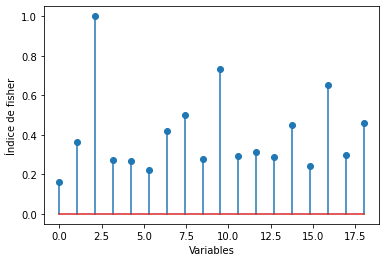

Index(['GameID', 'APM', 'ActionsInPAC'], dtype='object')

In [155]:
df.columns[np.argpartition(IndiceFisher(X),3)[:3]]

##Selección de características

###Busqueda secuencial hacia adelante

In [158]:
def BusquedaSecuencialHaciaAdelante(X,Y,num_ft):
  estimator= MLPClassifier(activation='logistic',hidden_layer_sizes= tuple(3*[100]), max_iter=1000)
  BSA = SFS(estimator, 
            k_features=num_ft, 
            forward=True, 
            floating=False, 
            verbose=2,
            scoring='accuracy',
            cv=0)
  BSA = BSA.fit(X, y)
  return BSA  

In [131]:
BSA=BusquedaSecuencialHaciaAdelante(X,y,X.shape[1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.1min finished

[2021-10-12 00:55:30] Features: 1/18 -- score: 0.37378277153558054[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  1.6min finished

[2021-10-12 00:57:04] Features: 2/18 -- score: 0.3940074906367041[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  1.4min finished

[2021-10-12 00:58:30] Features: 3/18 -- score: 0.4101123595505618[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [132]:
#Resultados de cada conjunto
pd.DataFrame.from_dict(BSA.subsets_)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
feature_idx,"(11,)","(2, 11)","(2, 6, 11)","(1, 2, 6, 11)","(1, 2, 3, 6, 11)","(1, 2, 3, 6, 7, 11)","(1, 2, 3, 6, 7, 11, 15)","(1, 2, 3, 6, 7, 10, 11, 15)","(1, 2, 3, 6, 7, 10, 11, 14, 15)","(1, 2, 3, 6, 7, 10, 11, 12, 14, 15)","(1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 15)","(1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15)","(1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
cv_scores,[0.37378277153558054],[0.3940074906367041],[0.4101123595505618],[0.4142322097378277],[0.4205992509363296],[0.42846441947565544],[0.4314606741573034],[0.43820224719101125],[0.4389513108614232],[0.448689138576779],[0.4696629213483146],[0.44644194756554306],[0.44269662921348313],[0.449063670411985],[0.43595505617977526],[0.4411985018726592],[0.4779026217228464],[0.45280898876404496]
avg_score,0.373783,0.394007,0.410112,0.414232,0.420599,0.428464,0.431461,0.438202,0.438951,0.448689,0.469663,0.446442,0.442697,0.449064,0.435955,0.441199,0.477903,0.452809
feature_names,"(11,)","(2, 11)","(2, 6, 11)","(1, 2, 6, 11)","(1, 2, 3, 6, 11)","(1, 2, 3, 6, 7, 11)","(1, 2, 3, 6, 7, 11, 15)","(1, 2, 3, 6, 7, 10, 11, 15)","(1, 2, 3, 6, 7, 10, 11, 14, 15)","(1, 2, 3, 6, 7, 10, 11, 12, 14, 15)","(1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 15)","(1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 15)","(1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)","(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","(0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


##Busqueda secuencial hacia atrás

In [159]:
def BusquedaSecuencialHaciaAtras(X,Y,num_ft):
  estimator= MLPClassifier(activation='logistic',hidden_layer_sizes= tuple(3*[100]), max_iter=1000)
  BSA = SFS(estimator, 
            k_features=num_ft, 
            forward=False, 
            floating=False, 
            verbose=2,
            scoring='accuracy',
            cv=0)
  BSA = BSA.fit(X, y)
  return BSA

In [160]:
BSB=BusquedaSecuencialHaciaAtras(X,y,X.shape[1])

In [161]:
pd.DataFrame.from_dict(BSB.subsets_)

,18
avg_score,0.434831
cv_scores,[0.4348314606741573]
feature_idx,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
feature_names,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


###Nuevo grupo de datos

In [30]:
Xbsa = df.drop(['APM','AssignToHotkeys', 'UniqueHotkeys','NumberOfPACs',
                'GapBetweenPACs', 'ActionLatency', 'ActionsInPAC', 
                'TotalMapExplored', 'WorkersMade'], axis=1).copy().values
Ybsa = df.LeagueIndex.values

In [31]:
Xbsa, Xbsa_val, Ybsa, Ybsa_val = train_test_split(Xbsa, Ybsa, test_size=0.2, stratify=Ybsa)

###Evaluación de los 3 mejores modelos

redes neuronales artificiales

In [35]:
rna = MLPClassifier(activation='logistic',hidden_layer_sizes= tuple(3*[100]), 
                    max_iter=1000).fit(X=Xbsa,y=Ybsa)
Ybsa_val_predictrna = rna.predict(Xbsa_val)
tablaResultados(y_true=Ybsa_val,y_pred=Ybsa_val_predictrna)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.155383,0.0,0.031032


Maquina de soporte vectorial

In [40]:
msv = SVC( kernel= "linear" , gamma= 0.01 , C= 2).fit(X=Xbsa, y=Ybsa)
Ybsa_val_predictmsv = msv.predict(X=Xbsa_val)
tablaResultados(y_true=Ybsa_val,y_pred=Ybsa_val_predictmsv)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.151292,0.0,0.017009


Gradient boosting tree

In [42]:
gbt= GradientBoostingClassifier(n_estimators= 10, max_depth=1).fit(Xbsa,Ybsa)
Ybsa_val_predictgbt =  gbt.predict(Xbsa_val)
tablaResultados(y_true=Ybsa_val,y_pred=Ybsa_val_predictgbt)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.151292,0.0,0.01744


##Extracción de características

In [162]:
def training_PCA(n_comp, X, Y):

    Errores = np.ones(5)
    j = 0
    kf =  StratifiedKFold(n_splits=5)

    varianza_acumulada=[]

    for train_index, test_index in kf.split(X,Y):  
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        # ¿es necesario estandarizacion de datos?
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
 
        pca = PCA(n_components=n_comp)
        X_train_pca = pca.fit_transform(X= X_train)
        X_test_pca = pca.transform(X= X_test)

        varianza_acumulada.append(sum(pca.explained_variance_ratio_))

    return np.mean(varianza_acumulada)

In [163]:
def testing_PCA(n_feats, X, Y):
    df = pd.DataFrame()
    idx = 0
   
    for f in n_feats:
        #Implemetamos la metodología de validación 
        df.loc[idx,'NUM_VAR'] = f
        df.loc[idx,'% VAR ACUM'] = training_PCA(n_comp=f, X=X,Y=Y)
        idx+=1
    return df

In [170]:
testing_PCA(n_feats=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 17, X.shape[1]], X= X, Y = y)

,NUM_VAR,% VAR ACUM
0,1.0,0.267940
1,2.0,0.383177
2,3.0,0.468253
3,4.0,0.539354
4,5.0,0.599351
5,6.0,0.654980
6,7.0,0.708274
7,8.0,0.754808
8,9.0,0.796717
9,10.0,0.836685


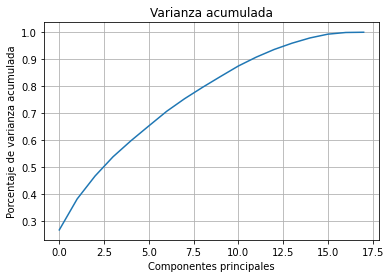

In [165]:
pca_varianza = PCA(n_components=X.shape[1]).fit(StandardScaler().fit_transform(X))
plt.plot(np.cumsum(pca_varianza.explained_variance_/np.sum(pca_varianza.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

###Nuevo grupo de datos

In [37]:
Xpca = df.drop(['NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'], axis=1).copy().values
Ypca = df.LeagueIndex.values

In [38]:
Xpca, Xpca_val, Ypca, Ypca_val = train_test_split(Xpca, Ypca, test_size=0.2, stratify=Ypca)

###Evaluación de los 3 mejores modelos

Redes neuronales artificiales

In [39]:
rna = MLPClassifier(activation='logistic',hidden_layer_sizes= tuple(3*[100]), max_iter=1000).fit(X=Xpca,y=Ypca)
Ypca_val_predictrna = rna.predict(Xpca_val)
tablaResultados(y_true=Ypca_val,y_pred=Ypca_val_predictrna)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.141679,0.0,-0.016615


Maquina de soporte vectorial

In [41]:
msv = SVC( kernel= "linear" , gamma= 0.01 , C= 2).fit(X=Xpca, y=Ypca)
Ypca_val_predictmsv = msv.predict(X=Xpca_val)
tablaResultados(y_true=Ypca_val,y_pred=Ypca_val_predictmsv)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.140542,0.0,-0.007091


Grandient boosting tree

In [43]:
gbt= GradientBoostingClassifier(n_estimators= 10, max_depth=1).fit(Xpca,Ypca)
Ypca_val_predictgbt =  gbt.predict(Xpca_val)
tablaResultados(y_true=Ypca_val,y_pred=Ypca_val_predictgbt)

,Balanced Accuracy test,Std test,Matthews corrcoef test
0,0.140542,0.0,-0.006661
